In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

## Information theory

Information entropy is an information theoretic concept introduced by Claude Shannon in a paper titled *A mathematical theory of communication* published in 1948. At it's core, information entropy tells us how much information is contained in the distribution of a variable. Bits are chosen as the unit of measure because information theory was originally devised to describe the novel communication systems of the mid 20th century: digital systems. 

### Entropy

Similar to statistical mechanics, information entropy $\mathbf{H}$ is a measure of uncertainty. In information theory, it is the average number of bits it takes to encode all possible states of the "system" $\chi$ given some probability distribution over those states $P(x)$. An example provides the quickest route to intuition so here is the definition straight away

\begin{equation*}
\textbf{H} = -\sum_{x\in \chi} P(x)\log_{2} P(x)
\end{equation*}

Note that you can use a $\log$ with whatever base you like as long as the units are noted. I use units of bits because this is intuitive but you can equivalently use a natural logarithm and units of 'nats'.

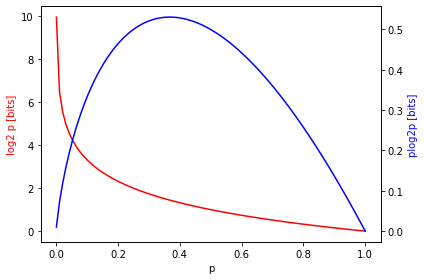

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

p = np.linspace(1e-3, 1, 100)
y1 = -np.log2(p)
y2 = p*y1

fig, ax1 = plt.subplots()
ax1.set_xlabel('p')
ax1.set_ylabel('log2 p [bits]', color='red')
ax1.plot(p, y1, color='red')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('plog2p [bits]', color='blue')
ax2.plot(p, y2, color='blue')

fig.tight_layout()
plt.show()

The plot in blue shows the contribution to the entropy in bits for a particular value of $p$. The total entropy is then found by sampling the blue curve according to the particular distribution $p(x)$ and adding up the samples.

### An example

Consider a horse race where the horses are equally likely to win. For the sake of generality let's assume there are $N$ horses and we want to send someone a binary string that tells them which horse won the race. The entropy is 

\begin{equation*}
\textbf{H} = \log_{2}N
\end{equation*}

So, in general, it will take you $\log_{2}N$ bits to describe the winner. For two horses, you only need one bit, for three horses, you need ~1.6 bits and so on. Notice that the calculation simplied significantly under the assumption that $P(x)$ was uniform or *flat*. You might guess that a uniform distribution provides the highest entropy, and you would be correct. Also, from an optimization perspective, the entropy defines a lower bound on the number of bits we need to describe $\chi$. You simply can't do better.

Typically things are not this simple and you have to compute $\textbf{H}$ for a more complicated distribution. To deal with that more general case, it helps to realize that the space of states $\chi$ is fixed for a given scenario. Our job is to best approximate the distribution on that space (which is not always easy apriori). For a given $\chi$, **the distribution P(x) is what determines the entropy**. To illustrate, consider another case where $P(x)$ is a delta function at $x_{0}$. Plugging that in to the definition above will yield $\textbf{H} = 0$ meaning there is no uncertainty in $x$ at all.


### Cross-Entropy and KL-Divergence

Above we discussed that the entropy lies somewhere between zero and the entropy of a uniform distribution. There is another interesting measure in information theory referred to as the *cross-entropy*. The cross-entropy is a measure of the degree of similarity between two distributions of the same variable $P(x)$ and $Q(x)$. 

\begin{equation*}
\textbf{H}(P,Q) = -\sum P\log_{2} Q
\end{equation*}

Notice that if the distributions are the same, then the cross-entropy is equivalent to the entropy. The cross-entropy also has an optimization interpretation. Let's say we know the entropy of a "good" distribution $P(x)$. Then we have another $Q(x)$ for which the entropy is higher. If we can in such a way transform $Q(x)$ to look like $P(x)$, we have optimized it. In other words, as $Q$ deviates from $P$, the cross-entropy becomes greater than the entropy. This leads us to the definition of KL-divergence:

\begin{equation*}
\textbf{KL}(P,Q) = \textbf{H}(P,Q) - \textbf{H}(P) \geq 0
\end{equation*}

Using the original definition of entropy gives us another very useful form:

\begin{equation*}
\textbf{KL}(P,Q) = -\sum P(x)\ln \frac{P(x)}{Q(x)}
\end{equation*}

The KL-Divergence is simply the difference between the cross-entropy and the entropy. As our predicted distribution gets closer to the actual distribution, the KL-Divergence tends to zero. Eventually, we will use these tools to understand a very common loss function in deep learning: cross-entropy loss.

### Unmeasurability of KL-Divergence

The definition of KL-divergence indicates that that in order to minimize it, we need to minimize the cross-entropy. That is a single $\Phi$ will minimize both measures.

\begin{equation*}
\DeclareMathOperator*{\argmin}{argmin}
\Phi^{*} = \underset{\Phi}{\argmin} H(P, Q_{\Phi}) = \underset{\Phi}{\argmin} KL(P, Q_{\Phi})
\end{equation*}

which must be true because $H(P)$ is not dependent on $\Phi$. 

\begin{equation*}
\DeclareMathOperator*{\argmin}{argmin}
\Phi^{*} = \underset{\Phi}{\argmin} H(P, Q_{\Phi})
\Phi^{*} = \underset{\Phi}{\argmin} H(Q_{\Phi}, P)
\end{equation*}

At the same time, we cannot actually measure the KL-divergence because we can't actually measure $H(P)$. 

### Asymmetry of KL-divergence and cross-entropy

There are two possible arrangements when computing cross-entropy or KL-divergence. The first is where we are tuning the distribution that defines the number of bits assigned to each $x$. The second is where we are tuning the distribution that assigns weights to each number of bits.

\begin{eqnarray}
\Phi^{*} &=& \underset{\Phi}{\argmin} H(P, Q_{\Phi})\\
\end{eqnarray}

In the first scenario, you tune $Q_{\Phi}$ until it covers all the support of $P$. In the second scenario, tuning $P_{\Phi}$ to minimize $H(P_{\Phi},Q)$ will result in all mass on the $x$ that maximizes $Q$. This can be shown as follows 

\begin{eqnarray}
\Phi^{*} &=& \underset{\Phi}{\argmin} H(P_{\Phi}, Q)
\end{eqnarray}

Consider the case where $P = \delta(x-x^{*})$ where $x^{*}$ maximizes $Q$. 

\begin{eqnarray}
P(y^{*}) &\leq& P(y) \\
\ln P(y^{*}) &\leq& \ln P(y) \\
Q\ln P(y^{*}) &\leq& Q\ln P(y) \\
H(P^{*}, Q) &\leq& H(P, Q) \\
\end{eqnarray}

So this minimization operation is sensitive to whether you are tuning the $P(x)$ term or the $Q(x)$ term in the original definition of cross-entropy. This has another very important implication. It shows us that the $Q$ term in $H(P,Q)$ will be the minimizer for the KL-divergence. The KL-divergence was an average over terms like $\frac{P(x)}{Q(x)}$ so if we tried to minimize by tuning $P$, we would end up with a single non-zero term $\frac{1}{Q(x^{*})}$.

### Shannon's measures of information

Shannon developed four basic measures of information: entropy, joint entropy, conditional entropy and mutual information. We can visualize these in a venn-diagram format. For two related variables $x$ and $y$, each has its own entropy $H(x)$ and $H(y)$ with their union being the join entropy $H(x,y)$. Then, we have the conditional entropies $H(x|y)$ and $H(y|x)$ being the regions that exclude the intersection. Finally the mutual information is the intersecting region $I(x,y)$.  


<img src="../../images/information-theory.png" width="400"/>

### Joint and conditional entropy

In the diagram above, we saw that the joint entropy was equal to the entropy of one variable plus the conditional entropy of another given that first variable. Let's prove the following relationship between the joint and conditional entropy $\textbf{H}(x,y) = H(x) + H(y|x)$

\begin{eqnarray}
\textbf{H}(x,y) &=& -\sum P(x,y)\ln P(x,y) \\
&=& -\sum P(x,y)\ln P(x)P(y|x)\\
&=& -\sum P(x,y)\ln P(x) -\sum P(x,y)P(y|x) \\
&=& H(x) + H(y|x)
\end{eqnarray}

The key to this proof was that $P(x,y) = P(x)P(y|x)$. It also shows that when probabilities multiply, entropies add. 

### Mutual information

The mutual information $I(x,y)$ is defined as the KL-divergence of the distribution $P(x,y)$ and its corresponding marginal distribution $ Q(x,y) = P(x)P(y)$.

\begin{eqnarray}
P(x) &=& \sum_{x} P(x,y) \\
P(y) &=& \sum_{y} P(x,y) \\
I(x,y) &=& KL(P,Q)
\end{eqnarray}

We can see in the venn diagram above that mutual information could be found by $I(x,y) = H(y) - H(y|x) = H(x) - H(x|y)$. Lets show this

\begin{eqnarray}
I(x,y) &=& KL(P,Q) \\
 &=& H(P,Q) - H(P) \\
 &=& \sum P(x,y)\ln Q(x,y) - \sum P(x,y)\ln P(x,y)\\
 &=& \sum P(x,y)[\ln P(x) + \ln P(y)]  - \sum P(x,y)[\ln P(x) + \ln P(y|x)]\\
 &=& \sum P(x,y)\ln P(y) - \sum P(x,y)\ln P(y|x) \\
 &=& H(y) - H(y|x) = H(x) - H(x|y)
\end{eqnarray}

Interestingly, this tells us that $H(y) \geq H(y|x)$ since the KL-divergence must be greater than or equal to zero. That is, adding information about $x$ will never decrease information you have about $y$.

### The data-processing inequality

The data-processing inequality states that for any function $f$ s.t. $y = f(x)$, we have that $H(y) \leq H(x)$. In plain english, that means that the process of transforming $x$ should never increase it's entropy. Recall from our analysis of joint entropy above that

\begin{eqnarray}
H(x,y) &=& H(x) + H(y|x)\\
&=& H(y) + H(x|y)
\end{eqnarray}

If we can show that $H(y|x) = 0$ then the data-processing inequality holds. This is more obvious if you notice that if $y = f(x)$ then the distribution $P(x,y) = P(x)$ or $P(y|x) = 0$. 

In terms of our venn diagram above, $H(y)$ is a *subset* of $H(x)$ which also implies the following for the mutual information: $I(x,y) = H(y)$. 